<a href="https://colab.research.google.com/github/urenajose/DS-Unit-1-Sprint-2-Statistics/blob/master/Jose_Urena_DSPT8_123_Confidence_Intervals_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy import stats
import copy
import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.set_option('display.expand_frame_repr', False)

In [3]:
url = "https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv"

In [4]:
bootc_df = pd.read_csv(url)

In [5]:
print(bootc_df.shape)
print(bootc_df.head())


(2761, 15)
   Unnamed: 0         Student          Employment                                     UndergradMajor                                            DevType  YearsCoding YearsCodingProf  ConvertedSalary                                     EducationTypes                                    SelfTaughtTypes                                  TimeAfterBootcamp                                 LanguageWorkedWith Gender                Age                 RaceEthnicity
0          62              No  Employed full-time  Computer science, computer engineering, or sof...  Back-end developer;Data scientist or machine l...  12-14 years       6-8 years         120000.0  Taken an online course in programming or softw...  The official documentation and/or standards fo...  I already had a full-time job as a developer w...                          C;F#;Haskell;Python;Scala   Male  25 - 34 years old  White or of European descent
1          73              No  Employed full-time  A humanities disciplin

In [6]:
print(bootc_df.tail())

      Unnamed: 0         Student                              Employment                                     UndergradMajor                                            DevType YearsCoding YearsCodingProf  ConvertedSalary                                     EducationTypes                                    SelfTaughtTypes                                  TimeAfterBootcamp                                 LanguageWorkedWith Gender                Age                 RaceEthnicity
2756       86961              No  Not employed, and not looking for work  Computer science, computer engineering, or sof...  Back-end developer;C-suite executive (CEO, CTO...  9-11 years      9-11 years         180000.0  Taken an online course in programming or softw...  Questions & answers on Stack Overflow;Online d...                                 Four to six months         JavaScript;Python;Ruby;HTML;CSS;Bash/Shell   Male  25 - 34 years old                Middle Eastern
2757       87004  Yes, full-time  Not em

In [7]:
print("describe \n",bootc_df.describe(include="all"))

describe 
           Unnamed: 0 Student          Employment                                     UndergradMajor               DevType YearsCoding YearsCodingProf  ConvertedSalary                                     EducationTypes                                    SelfTaughtTypes                                  TimeAfterBootcamp          LanguageWorkedWith Gender                Age                 RaceEthnicity
count    2761.000000    2761                2761                                               2761                  2761        2761            2761      2761.000000                                               2761                                               2761                                               2761                        2761   2761               2761                          2761
unique           NaN       3                   6                                                 12                   937          11              11              NaN               

In [8]:
print("Sum of null",bootc_df.isnull().sum())

Sum of null Unnamed: 0            0
Student               0
Employment            0
UndergradMajor        0
DevType               0
YearsCoding           0
YearsCodingProf       0
ConvertedSalary       0
EducationTypes        0
SelfTaughtTypes       0
TimeAfterBootcamp     0
LanguageWorkedWith    0
Gender                0
Age                   0
RaceEthnicity         0
dtype: int64


In [9]:
print("info",bootc_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2761 entries, 0 to 2760
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2761 non-null   int64  
 1   Student             2761 non-null   object 
 2   Employment          2761 non-null   object 
 3   UndergradMajor      2761 non-null   object 
 4   DevType             2761 non-null   object 
 5   YearsCoding         2761 non-null   object 
 6   YearsCodingProf     2761 non-null   object 
 7   ConvertedSalary     2761 non-null   float64
 8   EducationTypes      2761 non-null   object 
 9   SelfTaughtTypes     2761 non-null   object 
 10  TimeAfterBootcamp   2761 non-null   object 
 11  LanguageWorkedWith  2761 non-null   object 
 12  Gender              2761 non-null   object 
 13  Age                 2761 non-null   object 
 14  RaceEthnicity       2761 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 323.7

##Boot Camp converted salary

In [10]:
print("describe of survey population \n",bootc_df["ConvertedSalary"].describe())

describe of survey population 
 count      2761.000000
mean      73453.404201
std       57710.453235
min           0.000000
25%       32628.000000
50%       65340.000000
75%      100000.000000
max      499344.000000
Name: ConvertedSalary, dtype: float64


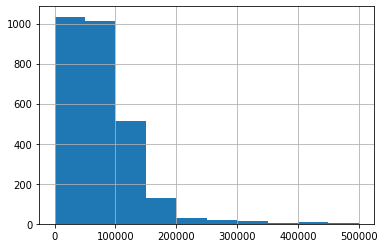

In [11]:
bootc_df["ConvertedSalary"].hist();

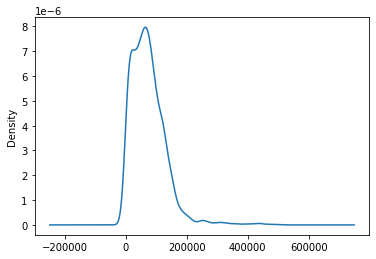

In [12]:
bootc_df["ConvertedSalary"].plot.density();

###**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [13]:
bootc_df20 = bootc_df.sample(20, random_state=42)#Random Sample of 20 the bootc_df20
copy.deepcopy(bootc_df) #since its random
print(bootc_df20.shape) #to check my work

(20, 15)


**2) Select random samples from this dataset, sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [14]:
bootc_df200 = bootc_df.sample(200, random_state=42)#Random Sample of 200 the bootc_df200
copy.deepcopy(bootc_df) #since its random
print(bootc_df200.shape) #to check your work

(200, 15)


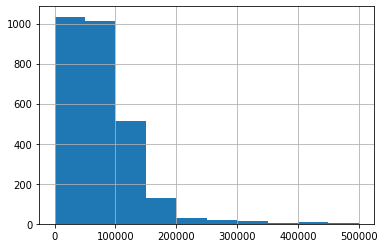

In [15]:
bootc_df["ConvertedSalary"].hist();

**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

describe sample 20 of survey population 
 count       200.000000
mean      68551.255000
std       57073.209978
min          24.000000
25%       27825.000000
50%       59674.500000
75%       95211.000000
max      466716.000000
Name: ConvertedSalary, dtype: float64


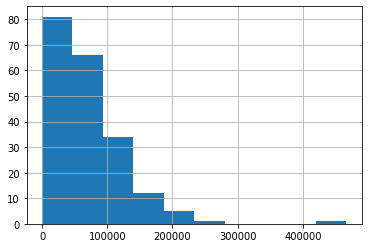

In [16]:
print("describe sample 20 of survey population \n",bootc_df200["ConvertedSalary"].describe(include="all"))
bootc_df200["ConvertedSalary"].hist();


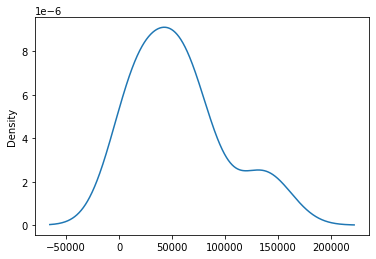

In [17]:
bootc_df20["ConvertedSalary"].plot.density();

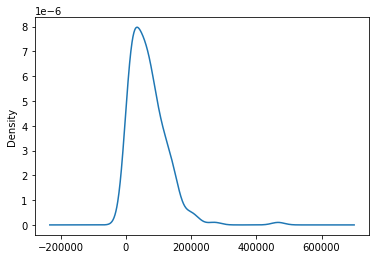

In [18]:
bootc_df200["ConvertedSalary"].plot.density();

**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

In [19]:
print("I trust more the mean of the random sample size of 200")
print("As the size of the sample size increase, error standard diviation get smaller")
print("It is probable, that an non-technical audience have no idea about which of these values is more trustworthy")


I trust more the mean of the random sample size of 200
As the size of the sample size increase, error standard diviation get smaller
It is probable, that an non-technical audience have no idea about which of these values is more trustworthy


**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

In [20]:
"No"

'No'

**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



In [21]:
"+/- Margin of error"

'+/- Margin of error'

## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



In [22]:
boottc_df20 = bootc_df20["ConvertedSalary"]
boottc_df200 = bootc_df200["ConvertedSalary"]

In [23]:
CI_bootc_df20 = stats.t.interval(.95, len(boottc_df20), loc= np.mean(boottc_df20),
                  scale = stats.sem(boottc_df20))
print(CI_bootc_df20)

(35872.392631018534, 75632.00736898146)


In [24]:
print(f"Give this particular sample (n={len(bootc_df20)}), we are 95% conf that the mean lies between {CI_bootc_df20[0]} and {CI_bootc_df20[1]}")

Give this particular sample (n=20), we are 95% conf that the mean lies between 35872.392631018534 and 75632.00736898146


In [25]:
CI_bootc_df200 = stats.t.interval(.95, len(boottc_df200), loc= np.mean(boottc_df200),
                  scale = stats.sem(boottc_df200))
print(CI_bootc_df200)

(60593.30223951439, 76509.20776048562)


In [26]:
print(f"Give this particular sample (n=200), we are 95% conf that the mean lies between {CI_bootc_df200[0]} and {CI_bootc_df200[1]}")

Give this particular sample (n=200), we are 95% conf that the mean lies between 60593.30223951439 and 76509.20776048562


**2) Which confidence interval is wider and why?**

The confidence interval of the first sample is much wider. Due to its lower sample size the standard error of our estimate is much larger causing the potential distribution of sample means to be much more spread out. A confidence interval catches 95% of this theoretical distriution of sample means so if our standard error is larger, our confidence interval will be wider as well.

In [27]:
print("The Standard of error for Sample population of 20",stats.sem(boottc_df20))
print("The Standard of error for Sample population of 20",f' {round((stats.sem(boottc_df20)/boottc_df20.mean())*100,2)}%')

The Standard of error for Sample population of 20 9530.275995506441
The Standard of error for Sample population of 20  17.09%


**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

In [28]:
print("The Standard of error for Sample population of 200",stats.sem(boottc_df200))
print("The Standard of error for Sample population of 200",f' {round((stats.sem(boottc_df200)/boottc_df200.mean())*100,2)}%')

The Standard of error for Sample population of 200 4035.6853799484325
The Standard of error for Sample population of 200  5.89%


The margin of error gives an idea of how far off our estimates might be (with 95% confidence). We're trying to supply a plausible range for our parameter of interest (the true average salary of bootcamp grads).

## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

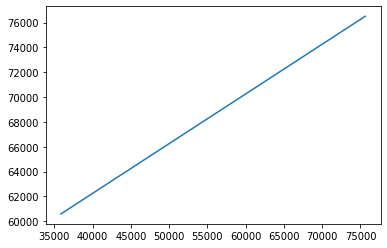

In [31]:
#plt.errorbar(x,y,yerr);
plt.errorbar(CI_bootc_df20, CI_bootc_df200, xerr = 0.5, yerr = 0.5);

**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

In [ ]:
data = {'sample(20)-L': CI_bootc_df20[0], 'sample(20)-H': CI_bootc_df20[1], 'sample(200)-H': CI_bootc_df200[1], 'sample(200)-L': CI_bootc_df200[0]}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 1, figsize=(9,10), sharey=True)
plt.bar(names, values, color=("#b64041","#b64241","#1F77B4","#1F77B4"))
fig.suptitle('95% confidence interval around both of the sample')
plt.show()

## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

In [ ]:
CI_bootc_df = stats.t.interval(.95, len(bootc_df["ConvertedSalary"]), loc= np.mean(bootc_df["ConvertedSalary"]),
                  scale = stats.sem(bootc_df["ConvertedSalary"]))
print(CI_bootc_df)
print(f"Give this particular sample (n={len(bootc_df)}), we are 95% conf that the mean lies between {CI_bootc_df[0]} and {CI_bootc_df[1]}")
print("The Standard of error for given population",f"{round(stats.sem(bootc_df['ConvertedSalary'])/np.mean(bootc_df['ConvertedSalary']))}%")

**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**

**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.